In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

---

## There will be three (or four) kwargs:

- `hline=` ... specify one or a list of prices to generate a ***horizontal line*** at that price level
- `vline=` ... specify one or a list of dates/datetimes to generate a ***vertical line*** at that point in time
- `aline=` ... specify one or more ***arbitrary line*** as
  - list of two or more ***x,y values*** (multiple lines are contiguous)
    - examples:
 `[(dateA,priceA),(dateB,priceB)]`
 `[(dateA,priceA),(dateB,priceB),(dateC,priceC),(dateD,priceD),...]`
  - list of one or more ***x,y value pairs*** (multiple lines need not be contiguous)
where a ***single x,y pair*** is like `((dateA,priceA),(dateB,priceB))`
    - examples: 
`aline=((dateA,priceA),(dateB,priceB))`
`aline=[((dateA,priceA),(dateB,priceB)),((dateC,priceC),(dateD,priceD)),...]`

- `tline=` ... ***trend line*** (still deciding whether to implement this).
  - specify two (or more) dates or datetimes:  mplfinance will ***automatically draw trend lines between the dates***.  An additional kwarg `tline_value` or something like that may specify which algorithm to use for calculating the trend line between any two dates.

---

---

## Test Plan

- Test each kwarg (`hline`, `vline`, `aline`, `tline`) on
  - one month daily data
  - a year or more of daily data
  - a day or more of intraday data
  
- For each kwarg test:
  - one line
  - two or more lines

- For all of the above test EVERY plot type (`ohlc`,`candle`,`line`,`renko`,`pnf`)

- For `aline` test BOTH ways of specifying lines

- For `vline` and `tline` test multiple ways of specifying dates

- Test all of the above both WITH and WITHOUT `make_addplot()` data

- For `tline` test with various `tline_value` settings.
  
---



In [3]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.4a0'

---
## hline TESTS:

_construct_hline_collections() called: 
hlines= [3112.0, 3140.0] 
minx,maxx= -0.95 19.95


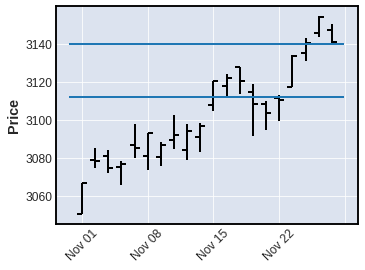

_construct_hline_collections() called: 
hlines= [3112.0, 3140.0] 
minx,maxx= -0.95 19.95


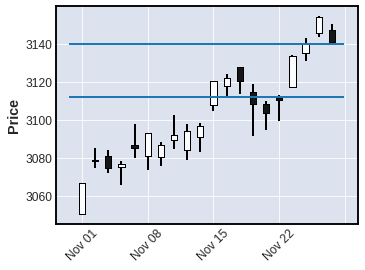

_construct_hline_collections() called: 
hlines= [3112.0, 3140.0] 
minx,maxx= -0.95 19.95


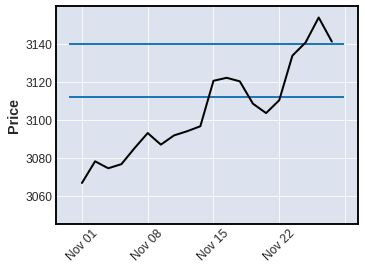

_construct_hline_collections() called: 
hlines= [3112.0, 3140.0] 
minx,maxx= -0.8 4.8


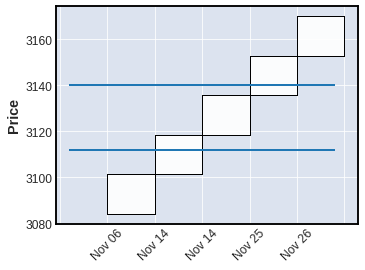

_construct_hline_collections() called: 
hlines= [3112.0, 3140.0] 
minx,maxx= -0.75 0.75


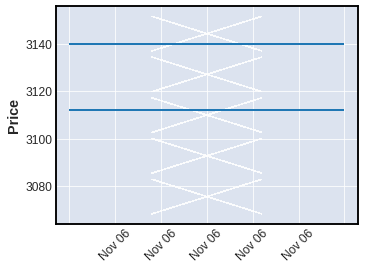

In [5]:
mpf.plot(daily,type='ohlc',hlines=[3112.0,3140.],figscale=0.75)
mpf.plot(daily,type='candle',hlines=[3112.0,3140.],figscale=0.75)
mpf.plot(daily,type='line',hlines=[3112.0,3140.],figscale=0.75)
mpf.plot(daily,type='renko',hlines=[3112.0,3140.],figscale=0.75)
mpf.plot(daily,type='pnf',hlines=[3112.0,3140.],figscale=0.75)

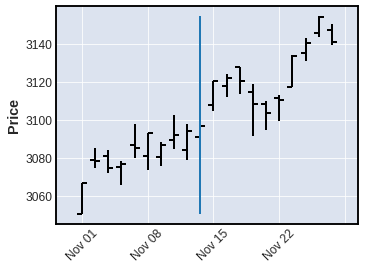

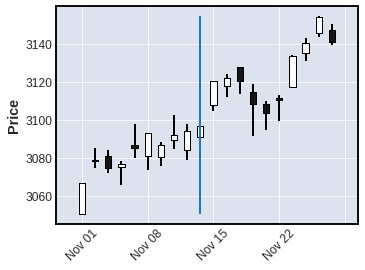

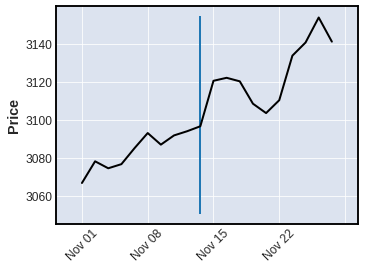

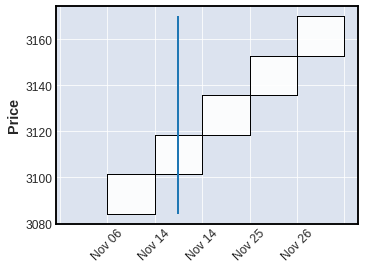

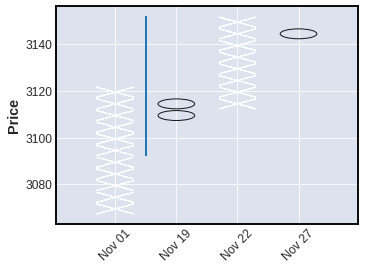

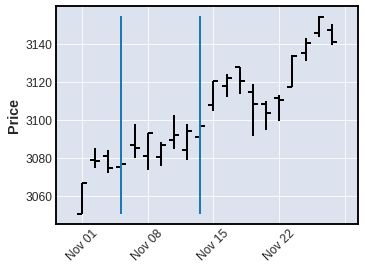

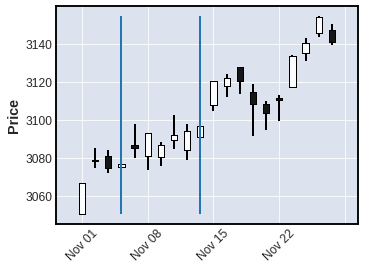

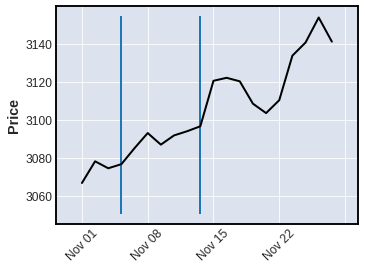

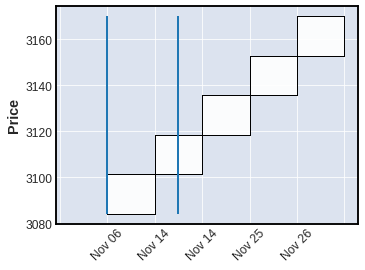

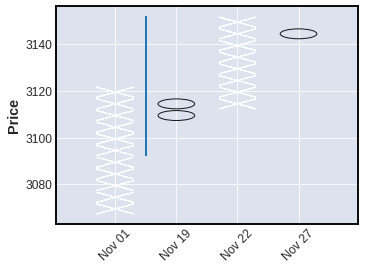

In [6]:
mpf.plot(daily,type='ohlc',vlines='2019-11-14',figscale=0.75)
mpf.plot(daily,type='candle',vlines='2019-11-14',figscale=0.75)
mpf.plot(daily,type='line',vlines='2019-11-14',figscale=0.75)
mpf.plot(daily,type='renko',vlines='2019-11-14',figscale=0.75)
cv={}
mpf.plot(daily,type='pnf',vlines='2019-11-14',pointnfig_params=dict(box_size=5),
         figscale=0.75,return_calculated_values=cv)

mpf.plot(daily,type='ohlc',vlines=['2019-11-14','2019-11-06'],figscale=0.75)
mpf.plot(daily,type='candle',vlines=['2019-11-14','2019-11-06'],figscale=0.75)
mpf.plot(daily,type='line',vlines=['2019-11-14','2019-11-06'],figscale=0.75)
mpf.plot(daily,type='renko',vlines=['2019-11-14','2019-11-06'],figscale=0.75)
cv={}
mpf.plot(daily,type='pnf',vlines=['2019-11-14','2019-11-06'],pointnfig_params=dict(box_size=5),
         figscale=0.75,return_calculated_values=cv)

In [7]:
cv

{'pnf_bricks': [3091.9099999999994, 3114.41, 3129.41, 3146.91],
 'pnf_dates': [datetime.datetime(2019, 11, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 22, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 27, 0, 0, tzinfo=datetime.timezone.utc)],
 'pnf_size': 5}

---

## Now a year or two of daily data:

In [8]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df = df.loc['2015-01-01':'2017-01-01',:]
df.shape
df.head(2)
df.tail(2)

(504, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,193.286972,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,189.796265,169632600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-29,224.479996,224.889999,223.839996,224.350006,220.071533,47719500
2016-12-30,224.729996,224.830002,222.729996,223.529999,219.267166,108998300


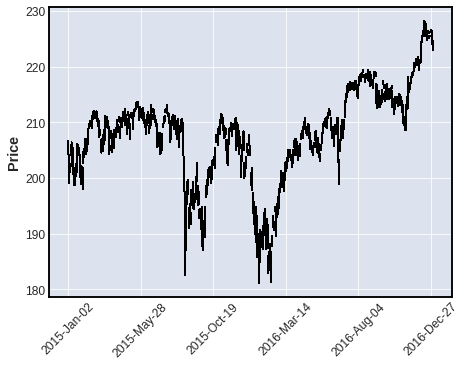

In [9]:
mpf.plot(df)

_construct_hline_collections() called: 
hlines= [197.5, 214] 
minx,maxx= -0.998015873015873 503.99801587301585


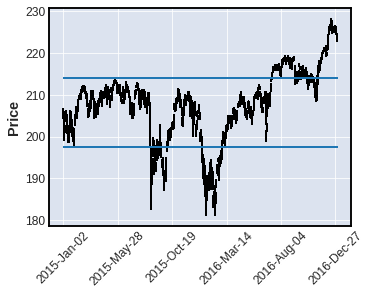

_construct_hline_collections() called: 
hlines= [197.5, 214] 
minx,maxx= -0.998015873015873 503.99801587301585


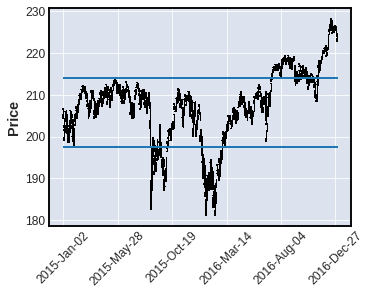

_construct_hline_collections() called: 
hlines= [197.5, 214] 
minx,maxx= -0.998015873015873 503.99801587301585


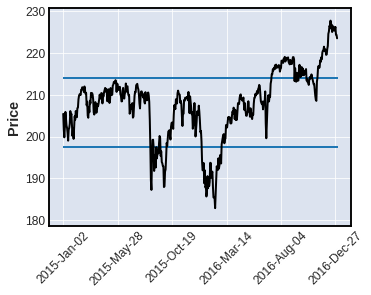

_construct_hline_collections() called: 
hlines= [197.5, 214] 
minx,maxx= -0.9926470588235294 135.99264705882354


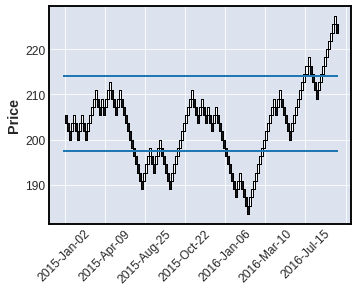

_construct_hline_collections() called: 
hlines= [197.5, 214] 
minx,maxx= -0.9714285714285714 34.97142857142857


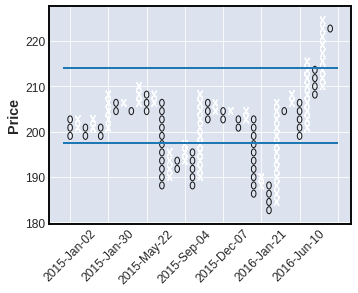

In [10]:
mpf.plot(df,type='ohlc',hlines=[197.5,214],figscale=0.75)
mpf.plot(df,type='candle',hlines=[197.5,214],figscale=0.75)
mpf.plot(df,type='line',hlines=[197.5,214],figscale=0.75)
mpf.plot(df,type='renko',hlines=[197.5,214],renko_params=dict(atr_length=90),figscale=0.75)
mpf.plot(df,type='pnf',hlines=[197.5,214],pointnfig_params=dict(atr_length=90),figscale=0.75)

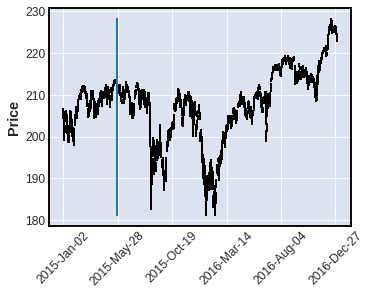

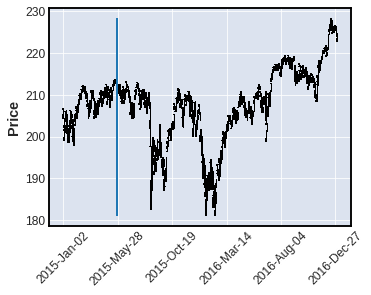

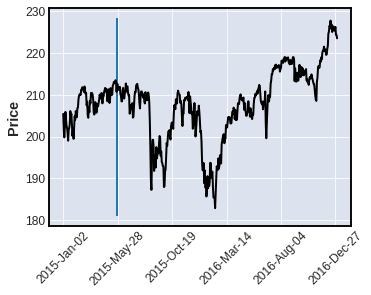

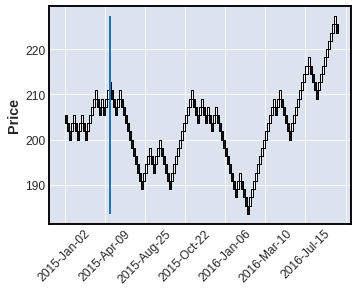

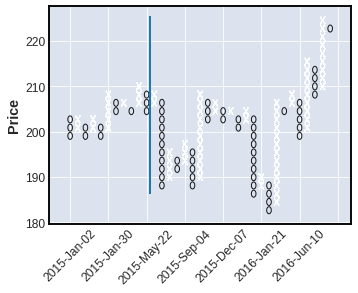

In [11]:
mpf.plot(df,type='ohlc',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='candle',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='line',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='renko',vlines=['5-27-2015'],renko_params=dict(atr_length=90),figscale=0.75)
mpf.plot(df,type='pnf',vlines=['5-27-2015'],pointnfig_params=dict(atr_length=90),figscale=0.75)

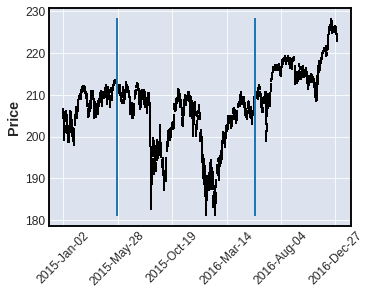

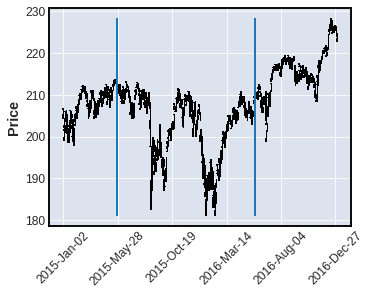

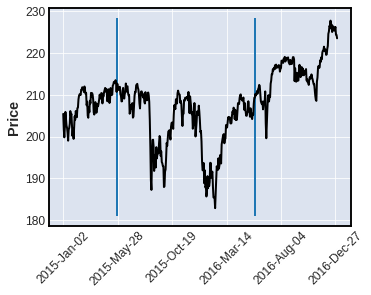

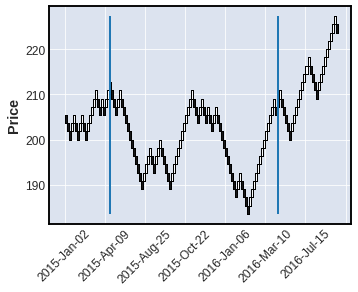

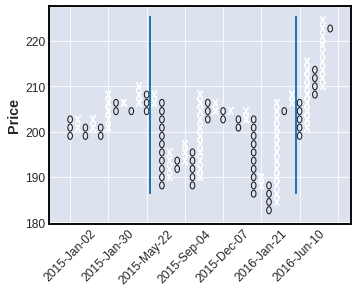

In [12]:
mpf.plot(df,type='ohlc',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='candle',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='line',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='renko',vlines=['5-27-2015','5-27-2016'],renko_params=dict(atr_length=90),figscale=0.75)
mpf.plot(df,type='pnf',vlines=['5-27-2015','5-27-2016'],pointnfig_params=dict(atr_length=90),figscale=0.75)

---

## Now Intraday Data

In [13]:
idf = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(2)
idf.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


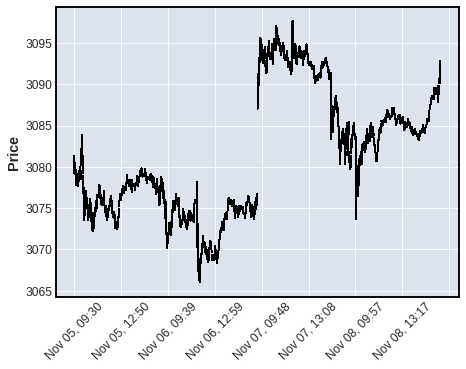

In [14]:
mpf.plot(idf)

In [15]:
len(idf)

1563

_construct_hline_collections() called: 
hlines= [3080.0] 
minx,maxx= -0.999360204734485 1562.9993602047346


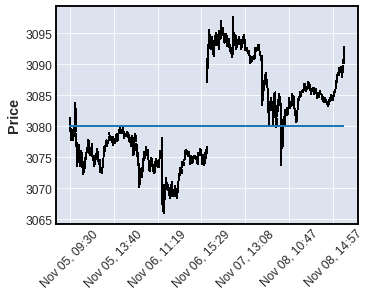

_construct_hline_collections() called: 
hlines= [3080.0] 
minx,maxx= -0.999360204734485 1562.9993602047346


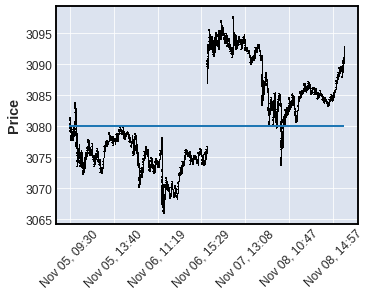

_construct_hline_collections() called: 
hlines= [3080.0] 
minx,maxx= -0.999360204734485 1562.9993602047346


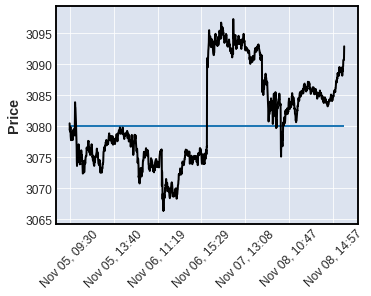

_construct_hline_collections() called: 
hlines= [3080.0] 
minx,maxx= -0.9956709956709957 230.995670995671


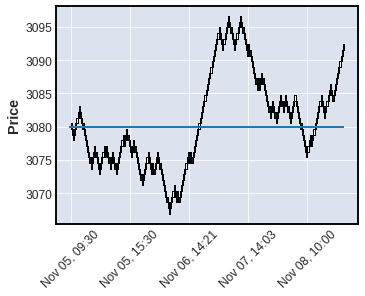

_construct_hline_collections() called: 
hlines= [3080.0] 
minx,maxx= -0.9285714285714286 13.928571428571429


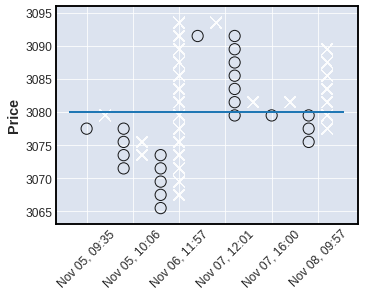

In [16]:
mpf.plot(idf,type='ohlc',hlines=[3080.],figscale=0.75)
mpf.plot(idf,type='candle',hlines=[3080.],figscale=0.75)
mpf.plot(idf,type='line',hlines=[3080.],figscale=0.75)
mpf.plot(idf,type='renko',hlines=[3080.],renko_params=dict(brick_size=0.85),figscale=0.75)
mpf.plot(idf,type='pnf',hlines=[3080.],pointnfig_params=dict(box_size=2),figscale=0.75)

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.999360204734485 1562.9993602047346


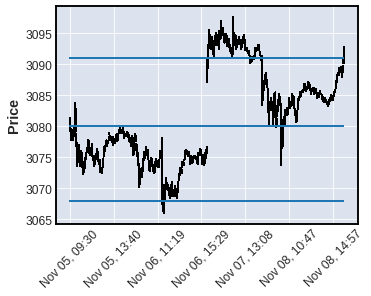

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.999360204734485 1562.9993602047346


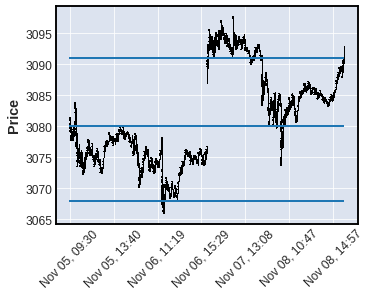

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.999360204734485 1562.9993602047346


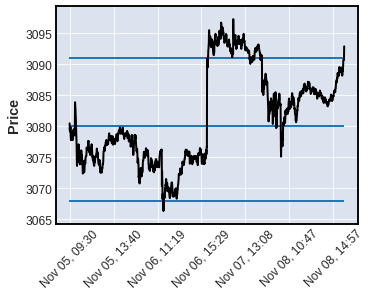

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.9956709956709957 230.995670995671


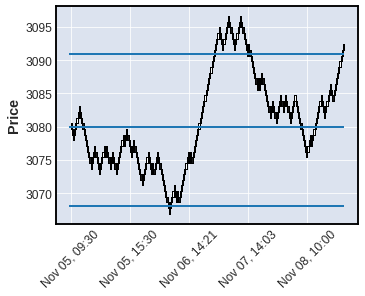

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.9285714285714286 13.928571428571429


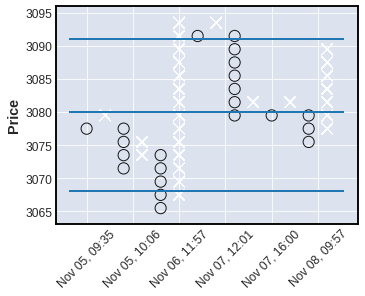

In [17]:
mpf.plot(idf,type='ohlc',hlines=[3080.,3091,3068],figscale=0.75)
mpf.plot(idf,type='candle',hlines=[3080.,3091,3068],figscale=0.75)
mpf.plot(idf,type='line',hlines=[3080.,3091,3068],figscale=0.75)
mpf.plot(idf,type='renko',hlines=[3080.,3091,3068],renko_params=dict(brick_size=0.85),figscale=0.75)
mpf.plot(idf,type='pnf',hlines=[3080.,3091,3068],pointnfig_params=dict(box_size=2),figscale=0.75)

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.9824561403508771 56.98245614035088


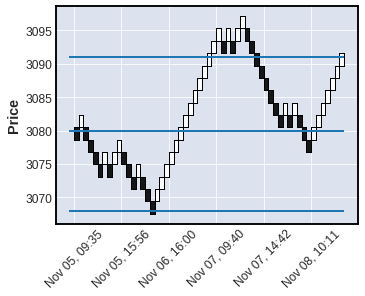

_construct_hline_collections() called: 
hlines= [3080.0, 3091, 3068] 
minx,maxx= -0.8 4.8


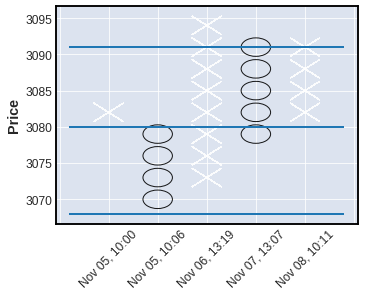

In [18]:
mpf.plot(idf,type='renko',hlines=[3080.,3091,3068],renko_params=dict(brick_size=1.85),figscale=0.75)

mpf.plot(idf,type='pnf',hlines=[3080.,3091,3068],pointnfig_params=dict(box_size=3),figscale=0.75)

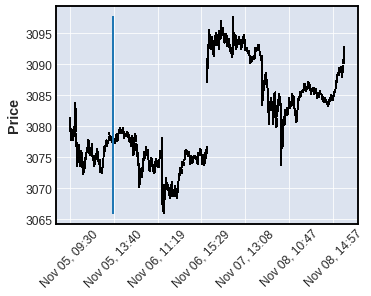

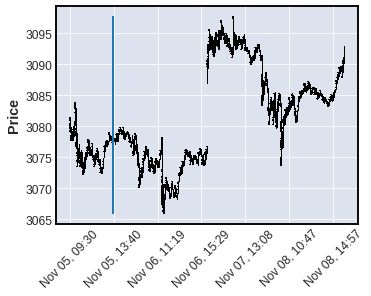

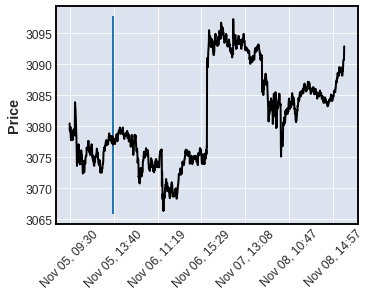

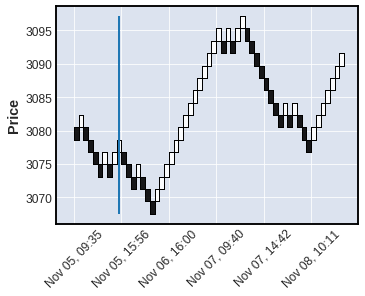

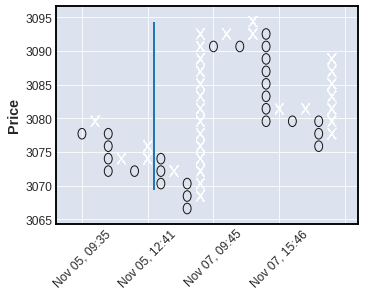

In [19]:
mpf.plot(idf,type='ohlc',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='candle',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='line',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='renko',vlines=['11/05/2019 13:36'],renko_params=dict(brick_size=1.85),figscale=0.75)
mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=1.85),figscale=0.75)

In [20]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-20-a6774c8535dd>, line 1)

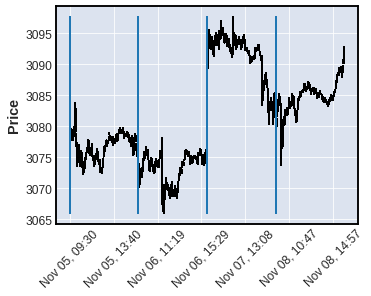

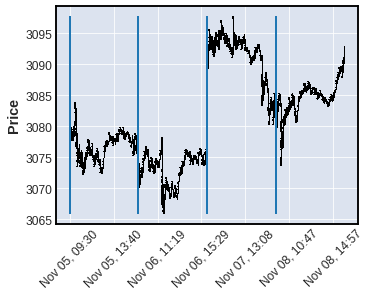

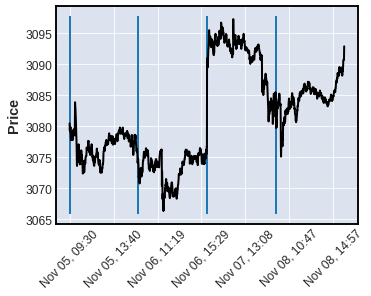

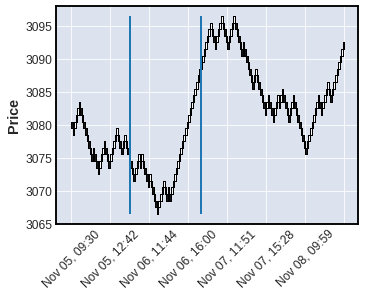

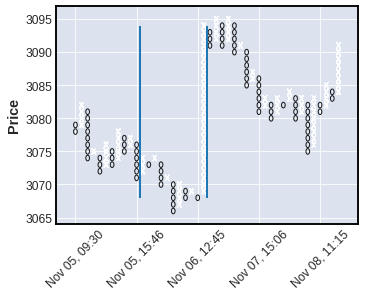

In [28]:
vls = ['11/05/2019 9:30','11/06/2019 9:30','11/07/2019 9:30','11/08/2019 9:30']
vlnoon = ['11/05/2019 12:30','11/06/2019 12:30','11/07/2019 12:30','11/08/2019 12:30']

mpf.plot(idf,type='ohlc',vlines=vls,figscale=0.75)
mpf.plot(idf,type='candle',vlines=vls,figscale=0.75)
mpf.plot(idf,type='line',vlines=vls,figscale=0.75)


mpf.plot(idf,type='renko',vlines=vls[1:3],renko_params=dict(brick_size=1.),figscale=0.75)
mpf.plot(idf,type='pnf',vlines=vls[1:3],pointnfig_params=dict(box_size=1.),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=vlnoon,renko_params=dict(brick_size=0.85),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=['11/05/2019 13:36'],renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=2),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=vlnoon[0],pointnfig_params=dict(box_size=2),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=2),figscale=0.75)

In [ ]:
STOP HERE
import importlib
importlib.reload(mpf)

In [22]:
vls = ['11/05/2019 9:30','11/06/2019 9:30','11/07/2019 9:30','11/08/2019 14:30']

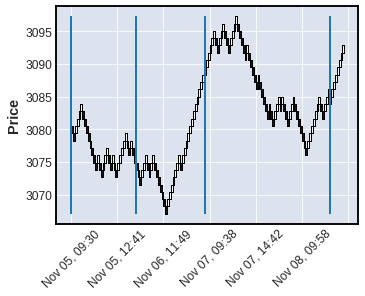

In [24]:
mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=1.12),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=vls[0:3],pointnfig_params=dict(box_size=1.85),figscale=0.75)

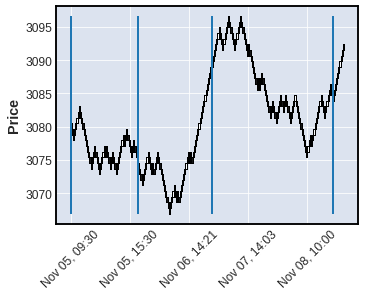

In [25]:
mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)

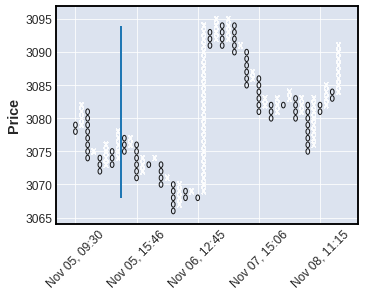

In [27]:
mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=1),figscale=0.75)

In [ ]:
STOP HERE

In [ ]:
segments=[
    [
        ('2019-11-8',3095.),('2019-11-15',3120.)#,('2019-11-17',3128.),('2019-11-22',3100.)
    ],
    [
        ('2019-11-17',3128.),('2019-11-22',3100.)
    ]
]

In [ ]:
# mpf.plot(daily,type='renko',show_nontrading=True)
# mpf.plot(daily,type='renko',show_nontrading=True)
# mpf.plot(daily,type='renko',lines=segments,figscale=1.25,show_nontrading=False)
# mpf.plot(daily,type='renko',lines=segments,figscale=1.25,show_nontrading=True)
# mpf.plot(daily,type='candle',lines=segments,figscale=1.25,show_nontrading=False)

In [ ]:
segments

### Tested:
- hlines: one line, two lines
- ohlc, candle, renko, pnf

In [ ]:
#mpf.plot(daily,type='renko',lines=segments,figscale=1.25,renko_params=dict(brick_size=7))
#mpf.plot(daily,type='renko',lines=segments,hlines=3110.0,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))
cvals = {}
mpf.plot(daily,type='p&f',hlines=[3112.0,3140.],figscale=1.25,return_calculated_values=cvals)#,renko_params=dict(brick_size='atr',atr_length=2))
#mpf.plot(daily,type='renko',hlines=3110.0,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))
#mpf.plot(daily,type='renko',lines=segments,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))

In [ ]:
cvals

bs = cvals['p&f_bricks']
type(bs)

bs2 = [b for b in bs]
bs == bs2

min(bs2)
max(bs2)

In [ ]:
STOP HERE

In [ ]:
cvals={}
#mpf.plot(daily,type='pnf',vlines=['2019-11-6','2019-11-20'],figscale=1.25)#,return_calculated_values=cvals)
mpf.plot(daily,type='pnf',vlines=['2019-11-6'],figscale=1.25)#,return_calculated_values=cvals)
mpf.plot(daily,type='pnf',figscale=1.25)#,return_calculated_values=cvals)

In [ ]:
#mpf.plot(daily,type='renko',lines=segments,figscale=1.25,renko_params=dict(brick_size=7))
#mpf.plot(daily,type='renko',lines=segments,hlines=3110.0,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))
#mpf.plot(daily,type='renko',hlines=3110.0,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))
#mpf.plot(daily,type='renko',lines=segments,figscale=1.25,renko_params=dict(brick_size='atr',atr_length=2))

In [ ]:
idf = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)

In [ ]:
isegs=[
    [
        ('2019-11-5 12:50',3080.),('2019-11-5 15:30',3070.),('2019-11-7 14:30',3090.)
    ],
]

In [ ]:
#mpf.plot(idf,lines=isegs,figscale=1.25)
#mpf.plot(idf,lines=isegs,figscale=1.25,show_nontrading=True)
mpf.plot(idf,lines=isegs,figscale=1.25,hlines=[3070,3090])
#mpf.plot(idf,lines=isegs,figscale=1.25,show_nontrading=True)

In [ ]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

In [ ]:
segs =[
    [
        ('2016-11-8',150.),('2017-11-15',175.)#,('2019-11-17',3128.),('2019-11-22',3100.)
    ],
    [
        ('2011-11-17',200.),('2013-11-22',200.)
    ]
]

In [ ]:
mpf.plot(df,lines=segs,figscale=1.25,type='candle',renko_params=dict(brick_size=3.005,atr_length=2))

In [ ]:
#STOP HERE

In [ ]:
#mpf.plot(daily,type='candle',volume=True,figscale=0.9)
#mpf.plot(daily,type='candle',volume=True,figscale=0.9,show_nontrading=True)

In [ ]:
#mpf.plot(daily,type='candle',volume=True,
#         title='\nS&P 500, Nov 2019',
#         ylabel='OHLC Candles',
#         ylabel_lower='Shares\nTraded')

In [ ]:
#mpf.plot(daily, type='line', linecolor='#00ff00')